In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Dealing with Outliers

In [72]:
df.corr()['SalePrice'].sort_values()

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_33180\4269891110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

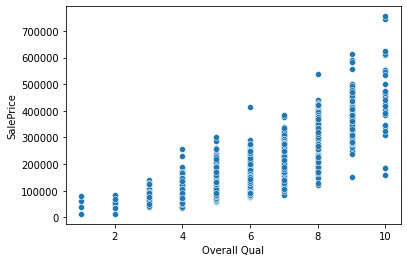

In [73]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

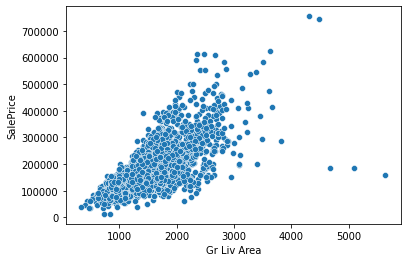

In [74]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

In [75]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [76]:
drop_ind = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [77]:
df = df.drop(drop_ind, axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

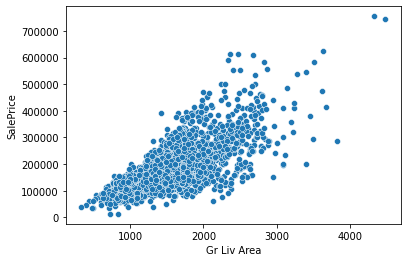

In [78]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

In [79]:
df.to_csv('Ames_Removed_Outliers.csv', index = False)

In [80]:
with open('./Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read()) 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Dealing with Missing Data

In [139]:
df = pd.read_csv('Ames_Removed_Outliers.csv')

In [140]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [141]:
df = df.drop('PID', axis = 1)

In [142]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [143]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [144]:
percent_nan = percent_missing(df)

In [146]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

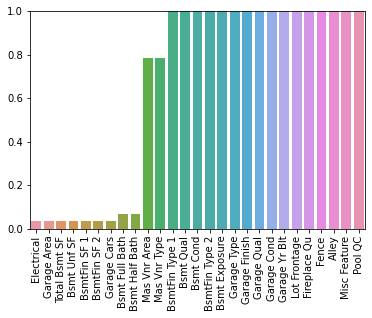

In [147]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0, 1)

In [148]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [149]:
len(df) * 0.034165 / 100
# Only 1 row is missing if percent of data missing is 0.034165

1.0000095500000001

In [150]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [151]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [152]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Cars'])
# Dropping these two features will result in removing many other features with null values

In [153]:
percent_nan = percent_missing(df)

In [154]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

- We can observe that lot of features realted to basement are missing so we can speculate that many of the houses did not have a basement

In [155]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [156]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [157]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


- We can observe that 1341 and 1497 are missing most of the basement features

In [158]:
# Basement numeric columns
# Didn't have a basement so numeric columns can be changed to zero 
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# Basement String columns
# We will replace them with None

bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [159]:
percent_nan = percent_missing(df)

(0.0, 1.0)

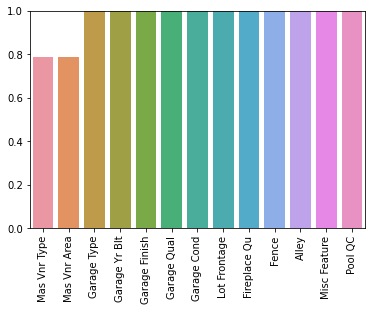

In [160]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0, 1)

In [161]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
# "None" because it matches one of the categories mentioned in the meta data

In [187]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [188]:
percent_nan = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

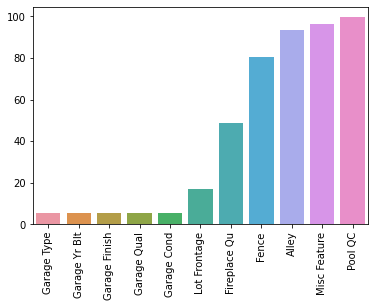

In [189]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)

In [197]:
gar_str_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [198]:
df[gar_str_columns] = df[gar_str_columns].fillna('None')

In [209]:
percent_nan = percent_missing(df)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

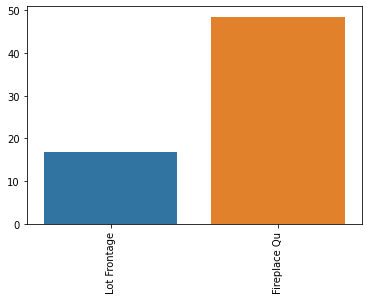

In [210]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)

In [202]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
#! Replacing with 0 as we are assuming that if Garage Year, Garage Quality, Garage finish and type are missing 
#! it means the garage does not exist 

In [207]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis = 1)

In [212]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [213]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

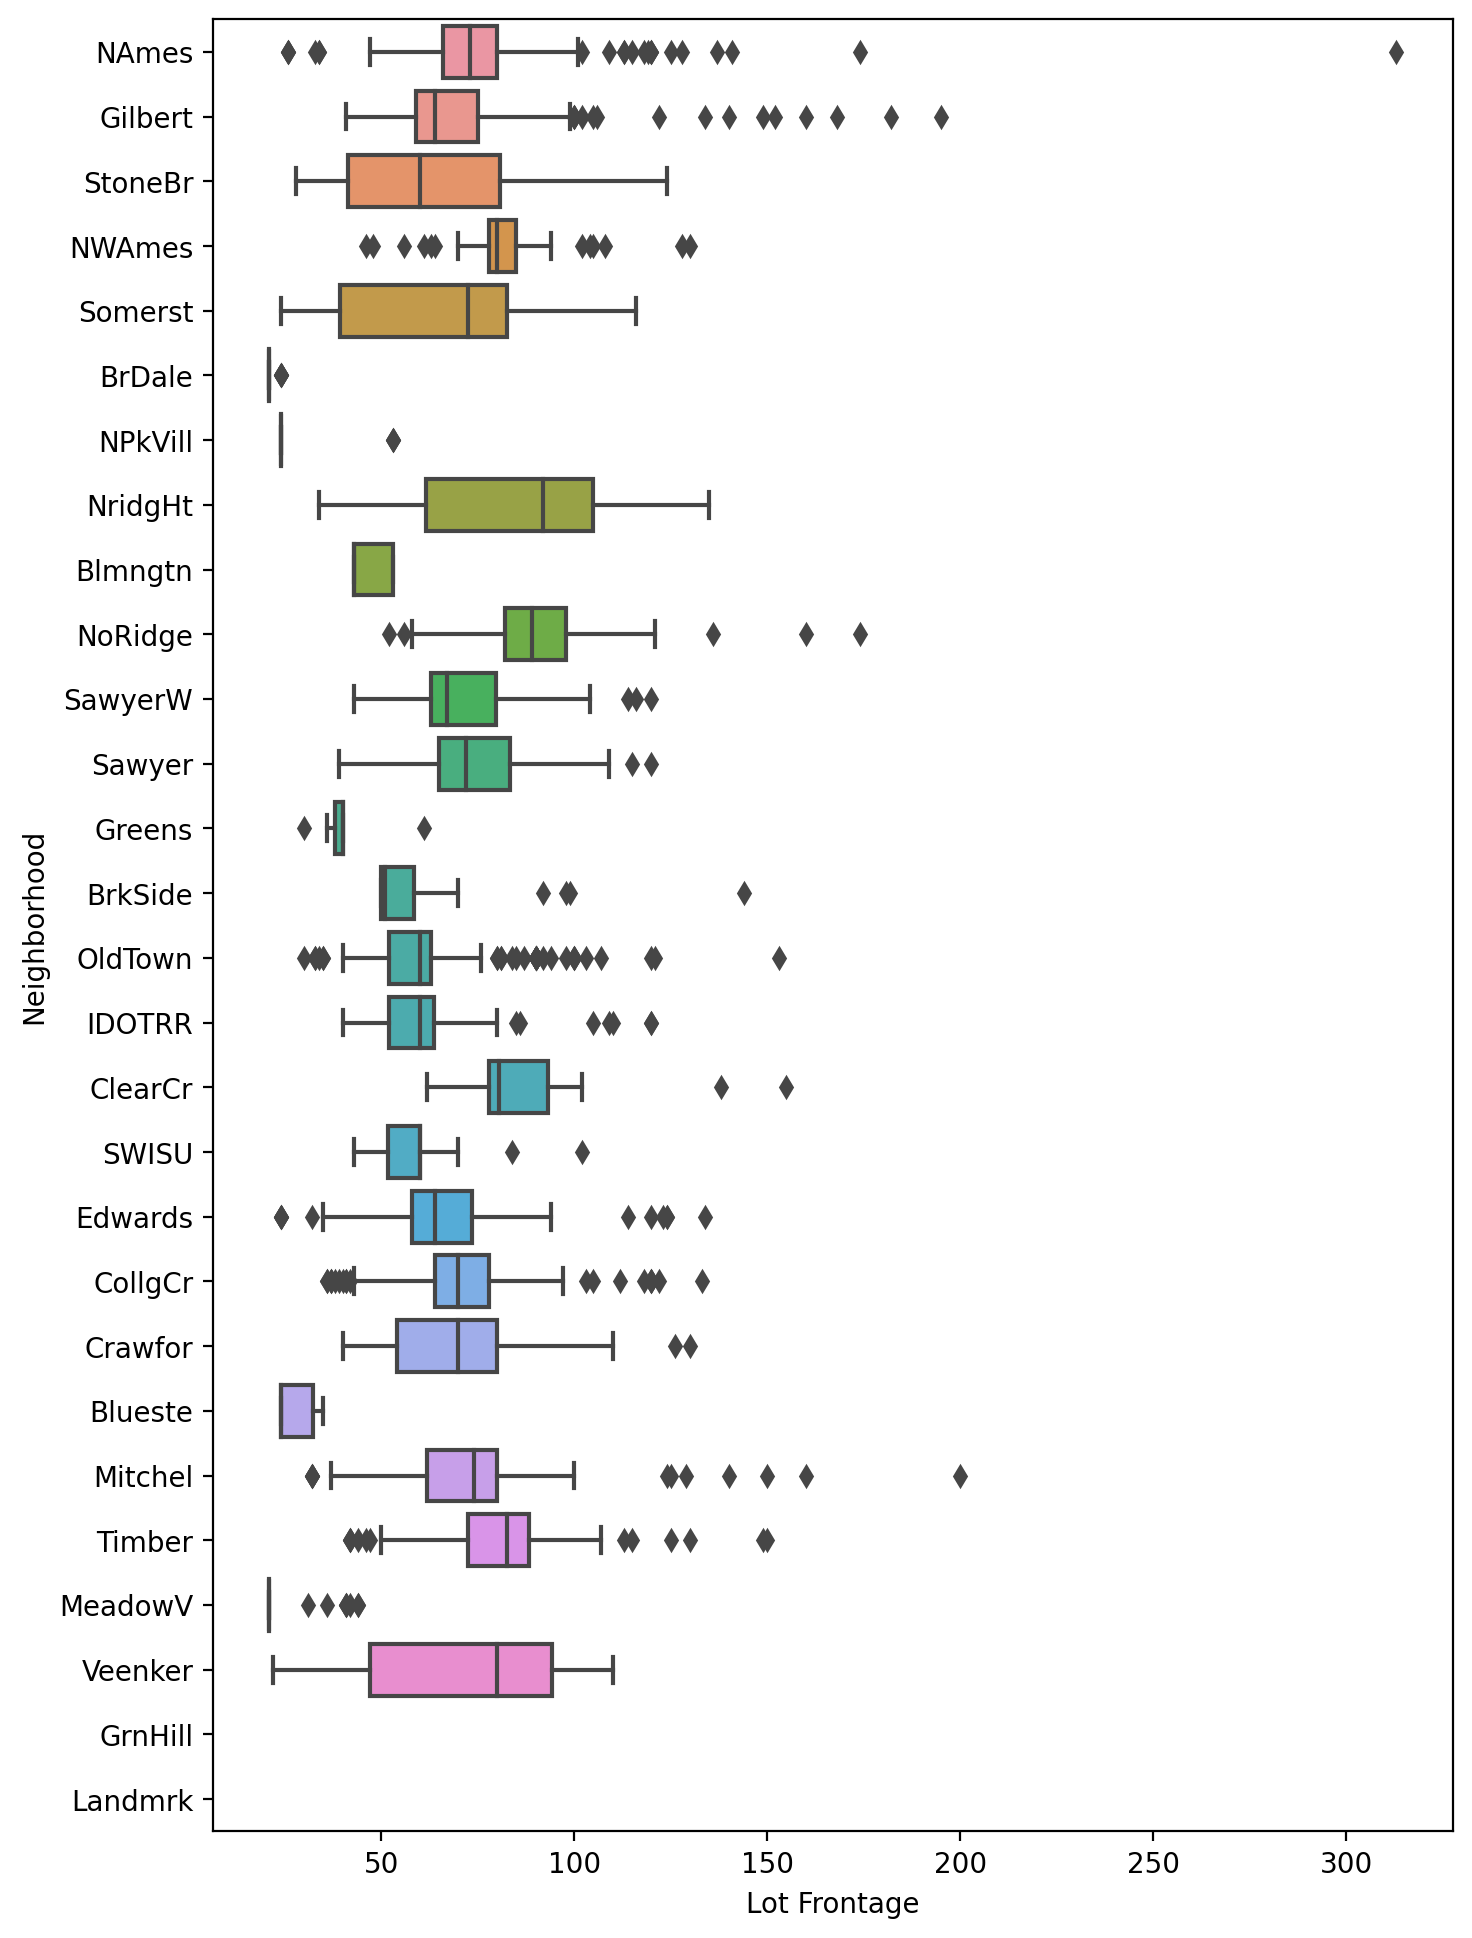

In [215]:
plt.figure(figsize = (8, 12), dpi = 200)
sns.boxplot(x = 'Lot Frontage', y = 'Neighborhood',data = df, orient = 'h' )

In [217]:
df.groupby(by = 'Neighborhood').mean()['Lot Frontage']

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_33180\2863320105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'Neighborhood').mean()['Lot Frontage']


Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [220]:
df[df['Neighborhood'] == 'NAmes']['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
23        NaN
        ...  
2627     69.0
2628     69.0
2629     74.0
2630     70.0
2631     70.0
Name: Lot Frontage, Length: 443, dtype: float64

In [221]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : print(value))

52      43.0
53      43.0
468     53.0
469     51.0
470     43.0
471     43.0
472     43.0
473     43.0
1080     NaN
1081     NaN
1082    43.0
1083    43.0
1084    53.0
1740    53.0
1741    53.0
1742     NaN
1743    53.0
2416    43.0
2417     NaN
2418     NaN
2419     NaN
2420     NaN
2421     NaN
2422    43.0
2423    43.0
2424    43.0
2425    53.0
2426    53.0
Name: Blmngtn, dtype: float64
298     35.0
299     35.0
932     24.0
933     24.0
934     24.0
935     24.0
1541    24.0
1542    24.0
2222    24.0
2224    35.0
Name: Blueste, dtype: float64
29      21.0
30      21.0
31      21.0
402     21.0
403     24.0
404     21.0
405     21.0
406     21.0
407     21.0
1039    21.0
1040    21.0
1041    21.0
1042    21.0
1043    21.0
1044    21.0
1045    21.0
1674    21.0
1675    21.0
1676    21.0
1677    24.0
1678    24.0
2361    24.0
2362    24.0
2363    21.0
2364    21.0
2365    21.0
2366    21.0
2367    21.0
2368    21.0
2369    21.0
Name: BrDale, dtype: float64
129     50.0
130     55.0
1

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_33180\868200782.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : print(value))
C:\Users\Shreyash\AppData\Local\Temp\ipykernel_33180\868200782.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : print(value))
C:\Users\Shreyash\AppData\Local\Temp\ipykernel_33180\868200782.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : print(value))
C:\Users\Shreyash\AppData\Local\Temp\ipykernel_33180\86820

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2922   NaN
2923   NaN
2924   NaN
2925   NaN
2926   NaN
Name: Lot Frontage, Length: 2925, dtype: float64

In [222]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))
# Visualize this
#! Take all the Neigborhoods and corresponding Lot Frontage
#? Ex NoRige = [34, 56, 77, Nan] -> Lot Frontage for Ex NoRidge -> value
#? OldTown = [35, 67 ,68] -> Lot Frontage for OldTown
#! Now call lambda function on each of the list, value in the lambda function is the list

In [223]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [225]:
percent_nan = percent_missing(df)

In [227]:
percent_nan

Series([], dtype: float64)

In [228]:
df.to_csv('No_missing_Data.csv', index = False)

In [3]:
df = pd.read_csv('No_missing_Data.csv')

In [4]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2921,20,RL,75.144444,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2922,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2923,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [5]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [6]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

- Do one hot encoding 

In [8]:
direction = pd.Series(['Up', 'Down', 'Up', 'Down'])

In [10]:
pd.get_dummies(direction, drop_first = True)

,Up
0,1
1,0
2,1
3,0


- Select a particular datatype
- **Pandas treats strings as object**

In [7]:
df.select_dtypes(include = object)

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [11]:
my_object_df = df.select_dtypes(include = 'object')

In [12]:
my_numeric_df = df.select_dtypes(exclude = 'object')

In [13]:
df_object_dummies = pd.get_dummies(my_object_df, drop_first = True)

In [14]:
df_object_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
final_df = pd.concat([my_numeric_df, df_object_dummies], axis = 1)

In [17]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [18]:
final_df.to_csv('FinalData.csv')